In [1]:
import pandas as pd
df=pd.read_csv("StudentsPerformance.csv")

In [2]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df = df.rename(columns={'math score': 'mathscore', 'reading score': 'readingscore','writing score':'writingscore'})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
mathscore                      0
readingscore                   0
writingscore                   0
dtype: int64

There are no null values present in dataset

In [5]:
q1=df.mathscore.quantile(0.25)
q3=df.mathscore.quantile(0.75)
q1,q3

(57.0, 77.0)

In [6]:
IQR=q3-q1
IQR

20.0

In [7]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(27.0, 107.0)

In [8]:
df[(df.mathscore<lower_limit)|(df.mathscore>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [9]:
df[(df.mathscore>lower_limit)&(df.mathscore<upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.describe()

,mathscore,readingscore,writingscore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:

df['zscore']=(df.mathscore - df.mathscore.mean())/df.mathscore.std()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828
1,female,group C,some college,standard,completed,69,90,88,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.653627
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517
998,female,group D,some college,standard,completed,68,78,77,0.126030


<Axes: ylabel='mathscore'>

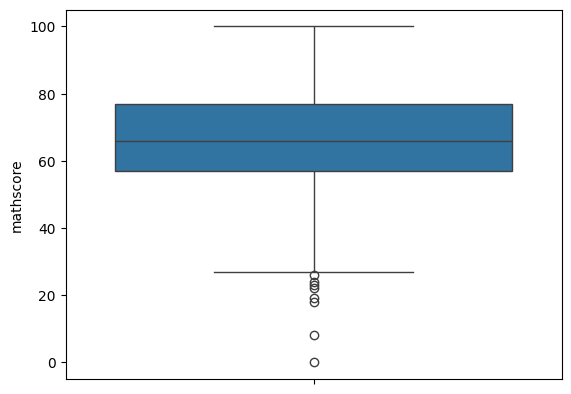

In [12]:
import seaborn as sns
sns.boxplot(df['mathscore'])

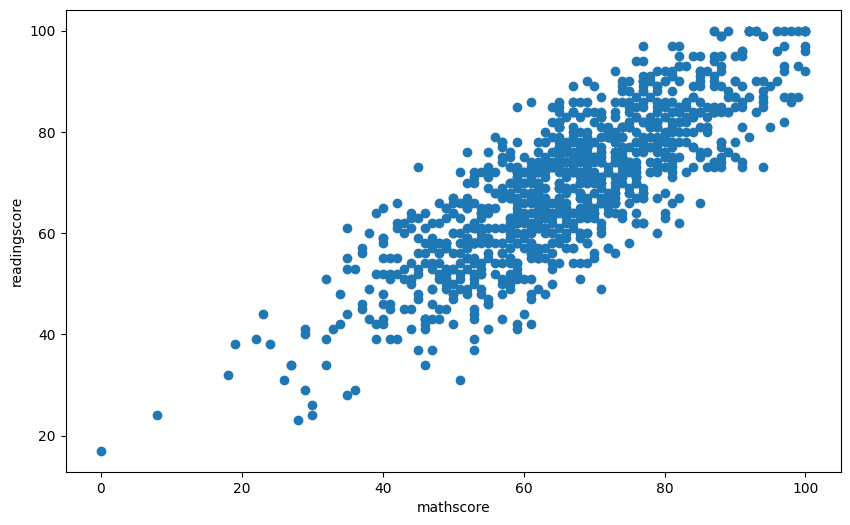

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['mathscore'], df['readingscore'])
ax.set_xlabel('mathscore')
ax.set_ylabel('readingscore')
plt.show()
